## ***Load Libraries***

In [1]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [6]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#!pip uninstall keras
#!pip install keras==2.11

In [10]:
%pip install tf-keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from tqdm.notebook import tqdm
from tensorflow.keras.models import load_model
from lime.lime_text import LimeTextExplainer
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from collections import Counter
import plotly.express as px
from plotly import colors
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import GRU, Dropout, Dense
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PLubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## ***Load Dataset***

In [17]:
# Folder path
folder_path = r'C:\Users\PLubi\OneDrive - Sol Plaatje University\Desktop\Standard Bank\Data'

In [18]:
# -----------------------------
# .Capitec
# -----------------------------
df = pd.read_csv(os.path.join(folder_path, 'standard_bank_reviews.csv'), parse_dates=['at', 'repliedAt'])
print("Capitec:", df.shape)

Capitec: (49485, 11)


In [19]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b00a33ab-e251-4d13-b32a-9041e71bd693,Melita Lerato,https://play-lh.googleusercontent.com/a/ACg8oc...,I've deposited money yesterday but still it ha...,1,0,3.64.1,2024-12-31 16:52:34,Hi Melita Lerato! We really appreciate you sha...,2024-12-31 17:07:26,3.64.1
1,25885af6-5309-4854-bf7c-7ba1847964d4,Molwantwa James Kubheka,https://play-lh.googleusercontent.com/a/ACg8oc...,Very hard to download standard bank,5,0,NaN,2024-12-31 14:15:59,Hi Molwantwa James Kubheka! We appreciate your...,2024-12-31 14:59:24,NaN
2,e3dc43ef-0fb0-4a30-bacd-8ba25f7ff12c,Boas Dube,https://play-lh.googleusercontent.com/a-/ALV-U...,Best bank whole world,5,0,3.64.1,2024-12-31 13:47:12,Hi Boas Dube! We’re so glad to hear you think ...,2024-12-31 14:15:14,3.64.1
3,0f648619-f7ff-4fef-b220-a2e7ca99d3d7,Linda Ngini,https://play-lh.googleusercontent.com/a/ACg8oc...,average ♥️,4,0,3.64.1,2024-12-31 13:35:23,"Good day, Linda. Thank you for sharing your fe...",2024-12-31 14:06:46,3.64.1
4,3edfd45c-900c-40f7-9415-0e27e543d377,Joao Jeremias,https://play-lh.googleusercontent.com/a/ACg8oc...,standard bank is #1 bank in rsa.,5,0,3.64.1,2024-12-31 13:06:55,Hi Joao. We’re thrilled to hear you think so h...,2024-12-31 14:06:30,3.64.1


# ***EDA***

In [20]:
# Display summary information about the dataset
print("\nSummary information about the dataset:")
print(df.info())


Summary information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49485 entries, 0 to 49484
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              49485 non-null  object        
 1   userName              49485 non-null  object        
 2   userImage             49485 non-null  object        
 3   content               49462 non-null  object        
 4   score                 49485 non-null  int64         
 5   thumbsUpCount         49485 non-null  int64         
 6   reviewCreatedVersion  42893 non-null  object        
 7   at                    49485 non-null  datetime64[ns]
 8   replyContent          26229 non-null  object        
 9   repliedAt             26229 non-null  datetime64[ns]
 10  appVersion            42893 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB
None


In [21]:
# statistics for numerical columns
print("\nBasic statistics for numerical columns:")
df.describe()


Basic statistics for numerical columns:


,score,thumbsUpCount,at,repliedAt
count,49485.000000,49485.000000,49485,26229
mean,3.629948,1.762090,2021-01-19 01:57:45.955117824,2021-09-27 16:08:50.649357568
min,1.000000,0.000000,2014-08-08 22:03:13,2014-08-11 12:02:08
25%,2.000000,0.000000,2020-02-15 13:31:37,2020-11-26 10:49:34
50%,5.000000,0.000000,2021-03-13 10:24:29,2021-11-30 18:34:34
75%,5.000000,0.000000,2022-02-16 10:28:36,2023-05-01 14:30:53
max,5.000000,2999.000000,2024-12-31 16:52:34,2024-12-31 17:07:26
std,1.703212,27.794033,NaN,NaN


In [22]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


reviewId                    0
userName                    0
userImage                   0
content                    23
score                       0
thumbsUpCount               0
reviewCreatedVersion     6592
at                          0
replyContent            23256
repliedAt               23256
appVersion               6592
dtype: int64

In [23]:
# Display the distribution of scores
print("\nDistribution of scores:")
df['score'].value_counts()


Distribution of scores:


score
5    26535
1    12318
4     5257
3     2857
2     2518
Name: count, dtype: int64

In [24]:
# Display the distribution of thumbs up count
print("\nDistribution of thumbs up count:")
df['thumbsUpCount'].value_counts()


Distribution of thumbs up count:


thumbsUpCount
0      40983
1       4032
2       1386
3        785
4        496
       ...  
89         1
162        1
150        1
475        1
100        1
Name: count, Length: 208, dtype: int64

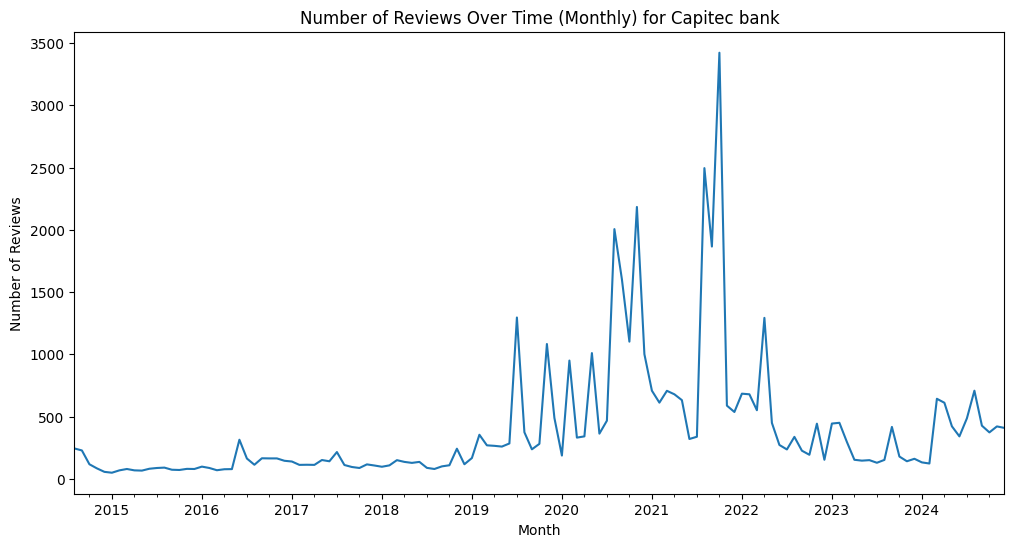

In [25]:
# Overall reviews over time
df['at'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Reviews Over Time (Monthly) for Capitec bank')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

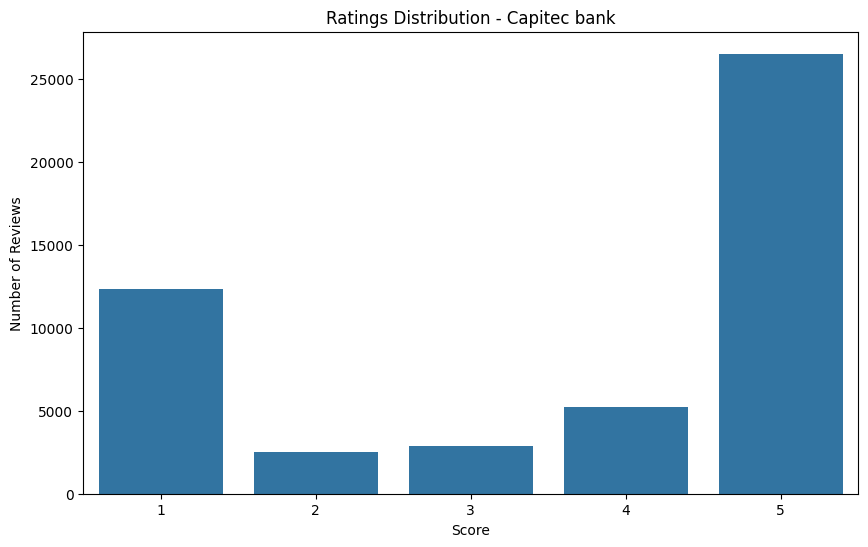

In [26]:
# Count reviews per score
counts = (
    df.groupby('score')
    .size()
    .reset_index(name='count')
)

# Sort and plot
counts = counts.sort_values('score')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=counts,
    x='score',
    y='count',
    order=[1, 2, 3, 4, 5]
)

plt.title('Ratings Distribution - Capitec bank')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()

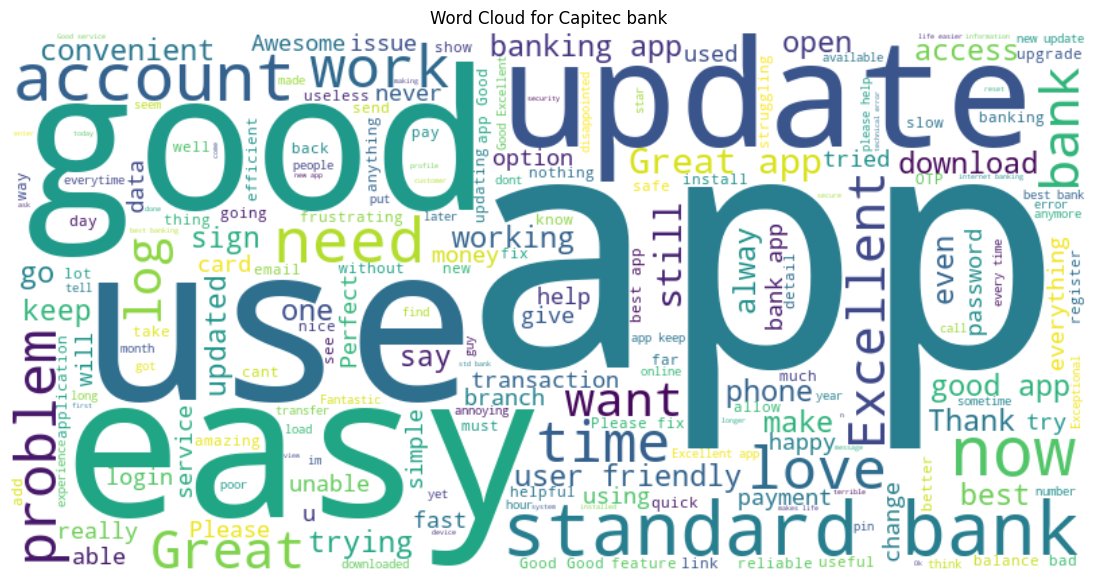

In [27]:
# Overall Word Cloud
all_text = " ".join(df['content'].dropna().astype(str))

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Capitec bank')
plt.show()

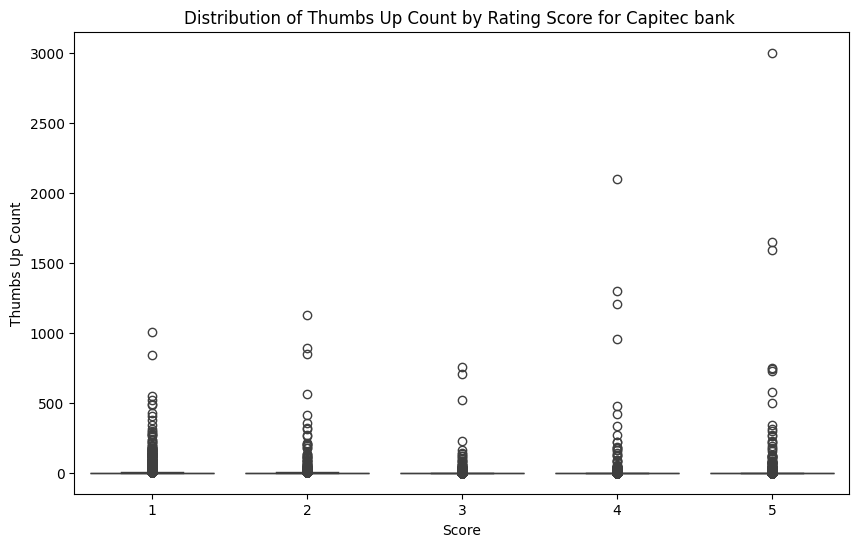

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='score', y='thumbsUpCount')
plt.title('Distribution of Thumbs Up Count by Rating Score for Capitec bank ')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.show()

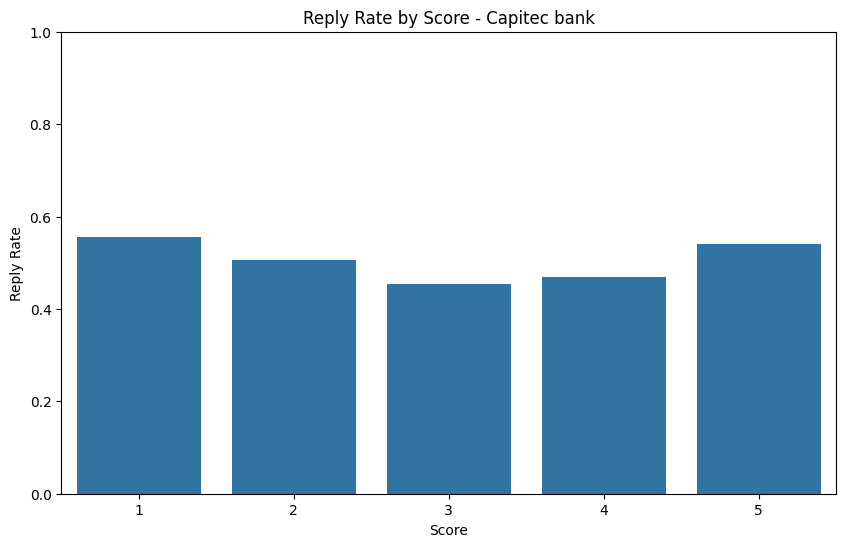

In [29]:
# Add reply flag
df['has_reply'] = df['replyContent'].notnull()

# Group by score only (no Bank_Name)
reply_rate_by_score = (
    df.groupby('score')['has_reply']
    .mean()
    .reset_index()
)

#  Sort by score
reply_rate_by_score = reply_rate_by_score.sort_values('score')

#  Plot: simple bar plot, no hue needed
plt.figure(figsize=(10, 6))
sns.barplot(
    data=reply_rate_by_score,
    x='score',
    y='has_reply',
    order=[1, 2, 3, 4, 5]
)

# Labels & title
plt.xlabel("Score")
plt.ylabel("Reply Rate")
plt.title("Reply Rate by Score - Capitec bank")
plt.ylim(0, 1)
plt.show()


# ***Data Cleaning and Preprocessing***

In [30]:
# Drop rows where review text is missing
df = df.dropna(subset=['content']).reset_index(drop=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49462 entries, 0 to 49461
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              49462 non-null  object        
 1   userName              49462 non-null  object        
 2   userImage             49462 non-null  object        
 3   content               49462 non-null  object        
 4   score                 49462 non-null  int64         
 5   thumbsUpCount         49462 non-null  int64         
 6   reviewCreatedVersion  42877 non-null  object        
 7   at                    49462 non-null  datetime64[ns]
 8   replyContent          26220 non-null  object        
 9   repliedAt             26220 non-null  datetime64[ns]
 10  appVersion            42877 non-null  object        
 11  has_reply             49462 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


In [32]:
# ================================================
#  STEP 2: Keep useful columns
# ================================================
# Example: using your combined_df
columns_to_keep = ['content', 'score', 'at','thumbsUpCount', 'appVersion']
df = df[columns_to_keep].copy()


In [33]:
# Fill missing appVersion with 'unknown'
df['appVersion'] = df['appVersion'].fillna('unknown')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49462 entries, 0 to 49461
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        49462 non-null  object        
 1   score          49462 non-null  int64         
 2   at             49462 non-null  datetime64[ns]
 3   thumbsUpCount  49462 non-null  int64         
 4   appVersion     49462 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.9+ MB


## **FEATURE ENGINEERING**

In [35]:
def label_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the function to create a new 'sentiment' column
df['sentiment'] = df['score'].apply(label_sentiment)

# Print the value counts of the 'sentiment' column
print(df['sentiment'].value_counts())


sentiment
positive    31774
negative    14832
neutral      2856
Name: count, dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49462 entries, 0 to 49461
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   content        49462 non-null  object        
 1   score          49462 non-null  int64         
 2   at             49462 non-null  datetime64[ns]
 3   thumbsUpCount  49462 non-null  int64         
 4   appVersion     49462 non-null  object        
 5   sentiment      49462 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.3+ MB


In [37]:
df.head()

,content,score,at,thumbsUpCount,appVersion,sentiment
0,I've deposited money yesterday but still it ha...,1,2024-12-31 16:52:34,0,3.64.1,negative
1,Very hard to download standard bank,5,2024-12-31 14:15:59,0,unknown,positive
2,Best bank whole world,5,2024-12-31 13:47:12,0,3.64.1,positive
3,average ♥️,4,2024-12-31 13:35:23,0,3.64.1,positive
4,standard bank is #1 bank in rsa.,5,2024-12-31 13:06:55,0,3.64.1,positive


In [38]:
temp = df.groupby('sentiment').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,content
2,positive,31774
0,negative,14832
1,neutral,2856


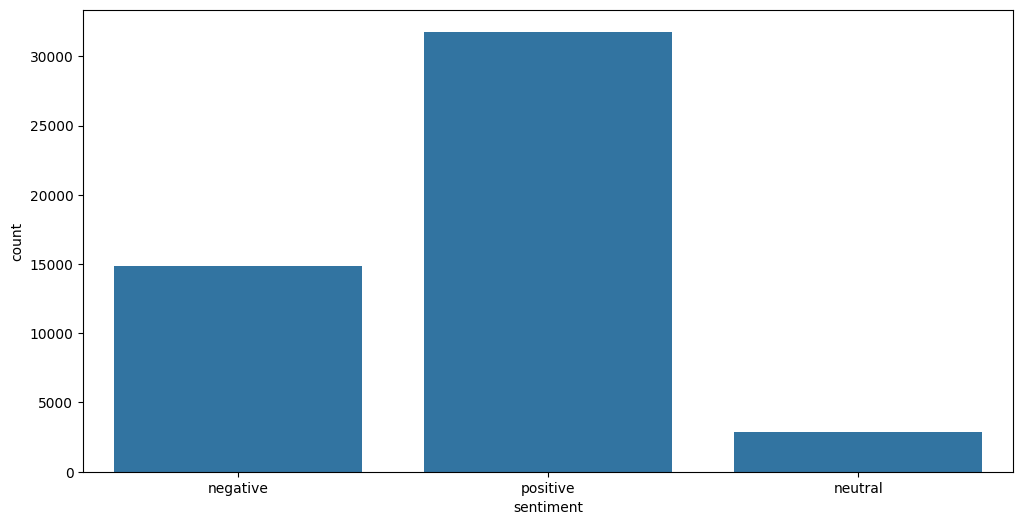

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)
plt.show()

In [40]:
%pip install contractions


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# =========================
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# =========================
#  TEXT CLEANING FUNCTION
# =========================
stop_words = set(stopwords.words('english')) - {'no', 'not'}
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove non-letters (keep alphabet and space)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords (preserving negations) + lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    
    return ' '.join(tokens)

df['clean_content'] = df['content'].apply(clean_text)


In [42]:
df.head()

,content,score,at,thumbsUpCount,appVersion,sentiment,clean_content
0,I've deposited money yesterday but still it ha...,1,2024-12-31 16:52:34,0,3.64.1,negative,deposited money yesterday still not reflected ...
1,Very hard to download standard bank,5,2024-12-31 14:15:59,0,unknown,positive,hard download standard bank
2,Best bank whole world,5,2024-12-31 13:47:12,0,3.64.1,positive,best bank whole world
3,average ♥️,4,2024-12-31 13:35:23,0,3.64.1,positive,average
4,standard bank is #1 bank in rsa.,5,2024-12-31 13:06:55,0,3.64.1,positive,standard bank bank rsa


# **Insightful Visualization**

In [43]:
df['temp_list'] = df['clean_content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,app,21617
1,not,15234
2,good,7205
3,bank,6340
4,use,4394
5,update,4261
6,easy,3936
7,great,3165
8,standard,3008
9,account,2969


In [44]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [46]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [47]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [48]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,good,7205
2,bank,6340
3,use,4394
4,update,4261
5,easy,3936
6,great,3165
7,standard,3008
8,account,2969
9,time,2948
10,excellent,2849


## **Most Common words in Text**

In [49]:
df['temp_list1'] = df['content'].apply(lambda x:str(x).split())
df['temp_list1'] = df['temp_list1'].apply(lambda x:remove_stopword(x))

In [50]:
top = Counter([item for sublist in df['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,app,15590
2,bank,3888
3,use,3611
4,good,3468
5,Good,3382
6,update,2980
7,The,2857
8,easy,2641
9,can't,2622
10,Very,2565


In [51]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

## **Most common words Sentiments Wise**

In [52]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

### Most common positive words

In [53]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,app,9351
1,good,6234
2,easy,3691
3,bank,3203
4,great,2883
5,use,2844
6,excellent,2794
7,best,2098
8,love,1677
9,banking,1636


In [54]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Most common Negative words

In [55]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,update,3305
2,bank,2811
3,account,1893
4,time,1846
5,even,1439
6,keep,1428
7,use,1335
8,standard,1288
9,work,1234
10,please,1222


In [56]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon negative Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

### Most common Neutral words

In [57]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,good,449
2,update,378
3,bank,326
4,account,309
5,please,241
6,time,231
7,use,215
8,need,201
9,work,197
10,payment,196


In [58]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

## **Wordcloud**

In [59]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=400,
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
d = '/kaggle/input/masks-for-wordclouds/'

In [60]:
cyberpunk_palette = ["#FF00FF", "#00FF00", "#0000FF"]
template = "plotly_dark"

In [61]:
# Word Length Distribution
word_lengths = [len(word) for text in df['content'] for word in text.split()]
word_lengths_counts = {length: word_lengths.count(length) for length in set(word_lengths)}

# Sort the word lengths by count in descending order
sorted_word_lengths = sorted(word_lengths_counts.items(), key=lambda x: x[1], reverse=True)
# Create a custom colorscale with a fixed number of colors
colorscale = colors.sample_colorscale('Viridis', len(word_lengths_counts))

In [62]:
# Create the bar chart trace
bar_trace = go.Bar(
    x=[length for length, count in sorted_word_lengths],
    y=[count for length, count in sorted_word_lengths],
    marker=dict(
        color=[colorscale[i] for i in range(len(sorted_word_lengths))],
        line=dict(
            color=cyberpunk_palette[0],
            width=2
        )
    ),
    hovertemplate='Word Length: %{x}<br>Count: %{y}<extra></extra>'
)

In [63]:
# Create the neon light effect trace
light_effect_trace = go.Scatter(
    x=[length for length, count in sorted_word_lengths],
    y=[count * 1.05 for length, count in sorted_word_lengths],
    mode='lines',
    line=dict(
        color=cyberpunk_palette[1],
        width=5
    ),
    hoverinfo='skip'
)

In [64]:
# Create the layout
layout = go.Layout(
    title="Word Length Distribution",
    xaxis=dict(
        title="Word Length",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    yaxis=dict(
        title="Count",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=100, r=50, b=100)
)

# Create the figure and show it
fig = go.Figure(data=[bar_trace, light_effect_trace], layout=layout)
fig.show()

In [65]:
# Sentence Length Distribution
sentence_lengths = [len(text.split()) for text in df['content']]

# Create a custom colorscale with a fixed number of colors
colorscale = colors.sample_colorscale('Viridis', len(set(sentence_lengths)))

bar_trace = go.Bar(
    x=sorted(set(sentence_lengths)),
    y=[sentence_lengths.count(length) for length in sorted(set(sentence_lengths))],
    marker=dict(
        color=[colorscale[i] for i in range(len(set(sentence_lengths)))],
        line=dict(
            color=cyberpunk_palette[0],
            width=2
        )
    ),
    hovertemplate='Sentence Length: %{x}<br>Count: %{y}<extra></extra>'
)

In [66]:
light_effect_trace = go.Scatter(
    x=sorted(set(sentence_lengths)),
    y=[sentence_lengths.count(length) * 1.05 for length in sorted(set(sentence_lengths))],
    mode='lines',
    line=dict(
        color=cyberpunk_palette[1],
        width=5
    ),
    hoverinfo='skip'
)

In [67]:
layout = go.Layout(
    title="Sentence Length Distribution",
    xaxis=dict(
        title="Sentence Length",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    yaxis=dict(
        title="Count",
        tickfont=dict(color=cyberpunk_palette[2])
    ),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=100, r=50, b=100)
)
fig = go.Figure(data=[bar_trace, light_effect_trace], layout=layout)
fig.show()

### Word cloud for positive Sentiment

In [68]:
# Word Cloud for Positive Sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['content'])
wordcloud = WordCloud(background_color='black', width = 800, height = 400, max_words=200, colormap='Greens').generate(positive_text)
fig = go.Figure(go.Image(z = np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title = 'Word Cloud For Positive Sentiment',
    template = template,
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = cyberpunk_palette[2],
    title_font_color = cyberpunk_palette[2],
    title_font_size = 20,
    margin = dict(t = 80, l = 50, r = 50, b = 50)
)
fig.show()

### word cloud for Negative Sentiment

In [69]:
# Word Cloud for Negative Sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['content'])
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words=200, colormap='Reds').generate(negative_text)
fig = go.Figure(go.Image(z=np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title="Word Cloud for Negative Sentiment",
    template=template,
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=50, r=50, b=50)
)
fig.show()

### word cloud for Neutral Sentiment

In [70]:
# Word Cloud for Neutral Sentiment
neutral_text = ' '.join(df[df['sentiment'] == 'neutral']['content'])
wordcloud = WordCloud(background_color='black', width=800, height=400, max_words=200, colormap='Blues').generate(neutral_text)
fig = go.Figure(go.Image(z=np.dstack((wordcloud.to_array(), wordcloud.to_array(), wordcloud.to_array()))))
fig.update_layout(
    title="Word Cloud for Neutral Sentiment",
    template=template,
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color=cyberpunk_palette[2],
    title_font_color=cyberpunk_palette[2],
    title_font_size=20,
    margin=dict(t=80, l=50, r=50, b=50)
)
fig.show()

# ***MODELS BUILDING***

## **BERT EMBEDDING**

In [71]:
%pip install -U sentence-transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
from sentence_transformers import SentenceTransformer

In [73]:
# =========================
# 1️⃣ Sentence Transformer Embeddings
# =========================
model = SentenceTransformer('all-MiniLM-L6-v2')
df['embedding'] = list(
    model.encode(df['clean_content'].tolist(), batch_size=32, show_progress_bar=True)
)
df['day'] = df['at'].dt.to_period('D').astype(str)

Batches: 100%|██████████| 1546/1546 [01:30<00:00, 17.13it/s]


# Data leakage Handling and preprocessing

In [74]:
# =========================
# 2️⃣ Daily Aggregations
# =========================
daily_embeddings = df.groupby('day')['embedding'].apply(lambda emb: np.mean(np.stack(emb), axis=0)).reset_index()
daily_scores = df.groupby('day')['score'].mean().reset_index()
failures_per_day = df[df['score'] < 3].groupby('day').size().reset_index(name='failures_count')
total_per_day = df.groupby('day').size().reset_index(name='total_count')

daily_data = (
    daily_embeddings
    .merge(daily_scores, on='day')
    .merge(failures_per_day, on='day', how='left')
    .merge(total_per_day, on='day', how='left')
)
daily_data['failures_count'] = daily_data['failures_count'].fillna(0).astype(int)
daily_data['failure'] = (daily_data['score'] < 3).astype(int)

In [75]:
# =========================
# 3️⃣ Feature Engineering (Failures-based features)
# =========================
daily_data['failures_lag1'] = daily_data['failures_count'].shift(1).fillna(daily_data['failures_count'].mean())

daily_data['failures_ratio'] = daily_data['failures_lag1'] / (daily_data['failures_count'] + 1e-6)

daily_data['failures_roll_mean'] = (
    daily_data['failures_count'].shift(1)
    .rolling(window=3, min_periods=1)
    .mean()
    .fillna(daily_data['failures_count'].mean())
)

daily_data['failures_roll_std'] = (
    daily_data['failures_count'].shift(1)
    .rolling(window=3, min_periods=1)
    .std()
    .fillna(0)
)

daily_data['failures_delta'] = daily_data['failures_count'] - daily_data['failures_lag1']


In [76]:
daily_data

,day,embedding,score,failures_count,total_count,failure,failures_lag1,failures_ratio,failures_roll_mean,failures_roll_std,failures_delta
0,2014-08-08,"[-0.09316743, -0.006784281, -0.0269197, -0.028...",5.000000,0,1,0,4.009732,4.009732e+06,4.009732,0.000000,-4.009732
1,2014-08-09,"[-0.03810301, 0.0116985245, -0.011376978, -0.0...",5.000000,0,7,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,2014-08-10,"[-0.051983688, -0.037979614, 0.024465954, -0.0...",5.000000,0,3,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,2014-08-11,"[-0.023579426, 0.0025919958, -0.010970413, -0....",3.000000,9,18,0,0.000000,0.000000e+00,0.000000,0.000000,9.000000
4,2014-08-12,"[-0.023327945, -0.004099631, -0.011069025, -0....",4.692308,0,13,0,9.000000,9.000000e+06,3.000000,5.196152,-9.000000
...,...,...,...,...,...,...,...,...,...,...,...
3694,2024-12-27,"[-0.037507348, 0.0021965848, -0.029428141, 0.0...",4.500000,1,16,0,2.000000,1.999998e+00,3.000000,1.732051,-1.000000
3695,2024-12-28,"[-0.021901896, -0.00627861, -0.0040655653, -0....",3.833333,1,6,0,1.000000,9.999990e-01,1.666667,0.577350,0.000000
3696,2024-12-29,"[-0.04715582, -0.0074026855, -0.030981733, -0....",4.000000,1,4,0,1.000000,9.999990e-01,1.333333,0.577350,0.000000
3697,2024-12-30,"[-0.04382121, 0.027460918, 0.0047178473, -0.02...",3.705882,5,17,0,1.000000,2.000000e-01,1.000000,0.000000,4.000000


## Train/Test split by Day (before fitting)

In [77]:
# =========================
# 4️⃣ Train/Test Split
# =========================
daily_data['day'] = pd.to_datetime(daily_data['day'])
split_idx = int(len(daily_data) * 0.8)
train_days = daily_data['day'].iloc[:split_idx]
test_days = daily_data['day'].iloc[split_idx:]

df['day'] = pd.to_datetime(df['day'])
df_train = df[df['day'].isin(train_days)]
df_test = df[df['day'].isin(test_days)]

## Fit LDA Vectors on Training Only

In [78]:
# =========================
# 5️⃣ LDA Topic Modeling
# =========================
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts_train = vectorizer.fit_transform(df_train['clean_content'])
X_counts_test = vectorizer.transform(df_test['clean_content'])

# Choose best n topics using training only
topic_range = range(2, 21)
perplexities = []
for n in topic_range:
    lda = LatentDirichletAllocation(n_components=n, random_state=42)
    lda.fit(X_counts_train)
    perplexities.append(lda.perplexity(X_counts_train))

best_n = topic_range[np.argmin(perplexities)]
lda_final = LatentDirichletAllocation(n_components=best_n, random_state=42)
lda_train = lda_final.fit_transform(X_counts_train)
lda_test = lda_final.transform(X_counts_test)

df_train['lda_vector'] = list(lda_train)
df_test['lda_vector'] = list(lda_test)

def aggregate_daily(df_subset):
    daily_emb = df_subset.groupby('day')['embedding'].apply(lambda e: np.mean(np.stack(e), axis=0)).reset_index()
    daily_lda = df_subset.groupby('day')['lda_vector'].apply(lambda v: np.mean(np.stack(v), axis=0)).reset_index()
    return daily_emb.merge(daily_lda, on='day')

daily_train = aggregate_daily(df_train).merge(daily_data, on='day')
daily_test = aggregate_daily(df_test).merge(daily_data, on='day')

C:\Users\PLubi\AppData\Local\Temp\ipykernel_45940\3162645801.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PLubi\AppData\Local\Temp\ipykernel_45940\3162645801.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
# =========================
# 6️⃣ PCA Dimensionality Reduction
# =========================
bert_array_train = np.vstack(daily_train['embedding_x'].values)
lda_array_train = np.vstack(daily_train['lda_vector'].values)

pca_bert = PCA(n_components=0.95, random_state=42)
bert_pca_train = pca_bert.fit_transform(bert_array_train)

pca_lda = PCA(n_components=0.95, random_state=42)
lda_pca_train = pca_lda.fit_transform(lda_array_train)

bert_array_test = np.vstack(daily_test['embedding_x'].values)
lda_array_test = np.vstack(daily_test['lda_vector'].values)

bert_pca_test = pca_bert.transform(bert_array_test)
lda_pca_test = pca_lda.transform(lda_array_test)

daily_train['embedding_pca'] = list(np.hstack([bert_pca_train, lda_pca_train]))
daily_test['embedding_pca'] = list(np.hstack([bert_pca_test, lda_pca_test]))

In [80]:
from sklearn.preprocessing import StandardScaler

# =========================
# 4️⃣ Structured Features (Failures-based)
# =========================
struct_features = [
    'failures_count',          # raw target signal included as feature
    'total_count',
    'failures_lag1', 
    'failures_ratio',
    'failures_roll_mean',
    'failures_roll_std',
    'failures_delta'
]

# Target variable (what we want to predict)
target_col = 'score'

# Separate features and target
X_train_struct = daily_train[struct_features].copy()
y_train = daily_train[target_col].copy()

X_test_struct = daily_test[struct_features].copy()
y_test = daily_test[target_col].copy()

# =========================
# Standardize Features
# =========================
scaler_struct = StandardScaler()

# Fit scaler only on train features (to prevent leakage)
X_struct_train = scaler_struct.fit_transform(X_train_struct)
X_struct_test = scaler_struct.transform(X_test_struct)


In [81]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# =========================
# 7️⃣ Target: failures_count
# =========================
target_col = 'score'

scaler_y = MinMaxScaler()

# Scale target variable (for GRU stability)
y_train_scaled = scaler_y.fit_transform(daily_train[[target_col]]).flatten()
y_test_scaled = scaler_y.transform(daily_test[[target_col]]).flatten()

# =========================
# 8️⃣ Combine embeddings + structured features
# =========================
X_train = np.hstack([
    np.vstack(daily_train['embedding_pca']),   # embeddings
    X_struct_train                             # engineered features
])

X_test = np.hstack([
    np.vstack(daily_test['embedding_pca']), 
    X_struct_test
])

print("Train:", X_train.shape, y_train_scaled.shape)
print("Test:", X_test.shape, y_test_scaled.shape)

Train: (2959, 204) (2959,)
Test: (740, 204) (740,)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# =========================
# Create Sequences for RNN
# =========================
window_size = 3

def create_sequences(X, y, window_size):
    """
    Convert feature and target arrays into rolling windows for RNN input.
    X: shape (num_samples, feature_dim)
    y: shape (num_samples,)
    Returns:
        X_seq: shape (num_sequences, window_size, feature_dim)
        y_seq: shape (num_sequences,)
    """
    X_seq, y_seq = [], []
    
    # Start from window_size to predict the next step after the window
    for i in range(window_size, len(X)):
        # Take the previous `window_size` steps as input
        X_seq.append(X[i-window_size:i])
        
        # Take the current step as the target (next step)
        y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)

# Ensure inputs are numpy arrays
X_train = np.array(X_train)
y_train_scaled = np.array(y_train_scaled)
X_test = np.array(X_test)
y_test_scaled = np.array(y_test_scaled)

# Generate sequences
X_train_seq, y_train_seq = create_sequences(X_train, y_train_scaled, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test_scaled, window_size)

print("Train sequences:", X_train_seq.shape, y_train_seq.shape)
print("Test sequences:", X_test_seq.shape, y_test_seq.shape)

Train sequences: (2956, 3, 204) (2956,)
Test sequences: (737, 3, 204) (737,)


# GRU-LSTM

In [83]:
# =========================
# 🔁 Build Hybrid GRU-LSTM Model
# =========================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    GRU(64, activation='tanh', return_sequences=True,
        input_shape=(window_size, X_train_seq.shape[2]), kernel_regularizer=l2(0.0001)),
    LSTM(32, activation='tanh', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(1, activation='linear', kernel_regularizer=l2(0.0001))
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

c:\Users\PLubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1491 - mae: 0.2834 - val_loss: 0.0663 - val_mae: 0.1838
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0802 - mae: 0.2039 - val_loss: 0.0597 - val_mae: 0.1769
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0738 - mae: 0.1995 - val_loss: 0.0534 - val_mae: 0.1612
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0711 - mae: 0.1971 - val_loss: 0.0552 - val_mae: 0.1719
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689 - mae: 0.1939 - val_loss: 0.0547 - val_mae: 0.1734
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0663 - mae: 0.1904 - val_loss: 0.0536 - val_mae: 0.1727
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0650 - mae: 0.1881 - val_loss: 0.0596 - val_mae: 0.1900
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0620 - mae: 0.1846 - val_loss: 0.0483 - val_mae: 0.1573
Epoch 9/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0618 - mae: 

In [84]:
# =========================
# Evaluate Model Performance on Test Set (failures_count)
# =========================
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.ndimage import gaussian_filter1d
import numpy as np

# --- Direct evaluation from Keras ---
loss, mae = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"\nTest MSE (from model.evaluate): {loss:.4f}")
print(f"Test MAE (from model.evaluate): {mae:.4f}")

# --- Predict failures_count on test sequence data ---
y_pred_scaled = model.predict(X_test_seq, verbose=0).flatten()

# Inverse transform to original failure counts
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

# --- Compute regression metrics (raw, no smoothing) ---
mse = mean_squared_error(y_test, y_pred)
mae_raw = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRaw Results (no smoothing) for failures_count")
print(f"MAE: {mae_raw:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²:  {r2:.4f}")

# --- Apply Gaussian smoothing ---
sigma_value = 1.5
y_pred_smoothed = gaussian_filter1d(y_pred, sigma=sigma_value)
y_test_smoothed = gaussian_filter1d(y_test, sigma=sigma_value)

# --- Metrics for smoothed results ---
mse_smooth = mean_squared_error(y_test_smoothed, y_pred_smoothed)
mae_smooth = mean_absolute_error(y_test_smoothed, y_pred_smoothed)
r2_smooth = r2_score(y_test_smoothed, y_pred_smoothed)

print(f"\nSmoothed Results (σ={sigma_value}) for failures_count")
print(f"MAE: {mae_smooth:.4f}")
print(f"MSE: {mse_smooth:.4f}")
print(f"R²:  {r2_smooth:.4f}")

# --- Sample predictions vs actual ---
print("\nSample Predictions (smoothed vs actual):")
for actual, predicted in zip(y_test_smoothed[:10], y_pred_smoothed[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {predicted:.2f}")



Test MSE (from model.evaluate): 0.0483
Test MAE (from model.evaluate): 0.1573

Raw Results (no smoothing) for failures_count
MAE: 0.6293
MSE: 0.6665
R²:  0.2070

Smoothed Results (σ=1.5) for failures_count
MAE: 0.3482
MSE: 0.1723
R²:  0.5374

Sample Predictions (smoothed vs actual):
Actual: 2.77 | Predicted: 3.40
Actual: 2.75 | Predicted: 3.35
Actual: 2.84 | Predicted: 3.29
Actual: 3.01 | Predicted: 3.26
Actual: 3.15 | Predicted: 3.27
Actual: 3.23 | Predicted: 3.30
Actual: 3.26 | Predicted: 3.33
Actual: 3.13 | Predicted: 3.35
Actual: 2.84 | Predicted: 3.30
Actual: 2.60 | Predicted: 3.16


In [85]:
# =========================
# 9️⃣ Predict + inverse scale
# =========================
from scipy.ndimage import gaussian_filter1d

# Predict on test sequences
y_pred = model.predict(X_test_seq).flatten()

# Inverse scale predictions and actuals (back to score units)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

# Smooth for visualization (Gaussian filter)
sigma_value = 1.5
y_pred_smooth = gaussian_filter1d(y_pred_inv, sigma=sigma_value)
y_test_smooth = gaussian_filter1d(y_test_inv, sigma=sigma_value)

# Build forecast DataFrame
df_forecast = pd.DataFrame({
    'Day': daily_test['day'].iloc[window_size - 1 : window_size - 1 + len(y_test_seq)].values,
    'Actual_Score': y_test_inv,
    'Predicted_Score': y_pred_inv,
    'Actual_Score_Smoothed': y_test_smooth,
    'Predicted_Score_Smoothed': y_pred_smooth
})

print(df_forecast.head())

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
         Day  Actual_Score  Predicted_Score  Actual_Score_Smoothed  \
0 2022-12-19      3.666667         3.505044               2.767885   
1 2022-12-20      1.000000         3.354325               2.751280   
2 2022-12-21      3.714286         3.198842               2.840752   
3 2022-12-22      2.625000         3.214139               3.012066   
4 2022-12-23      3.666667         3.219430               3.152067   

   Predicted_Score_Smoothed  
0                  3.396638  
1                  3.348240  
2                  3.289759  
3                  3.259897  
4                  3.267627  


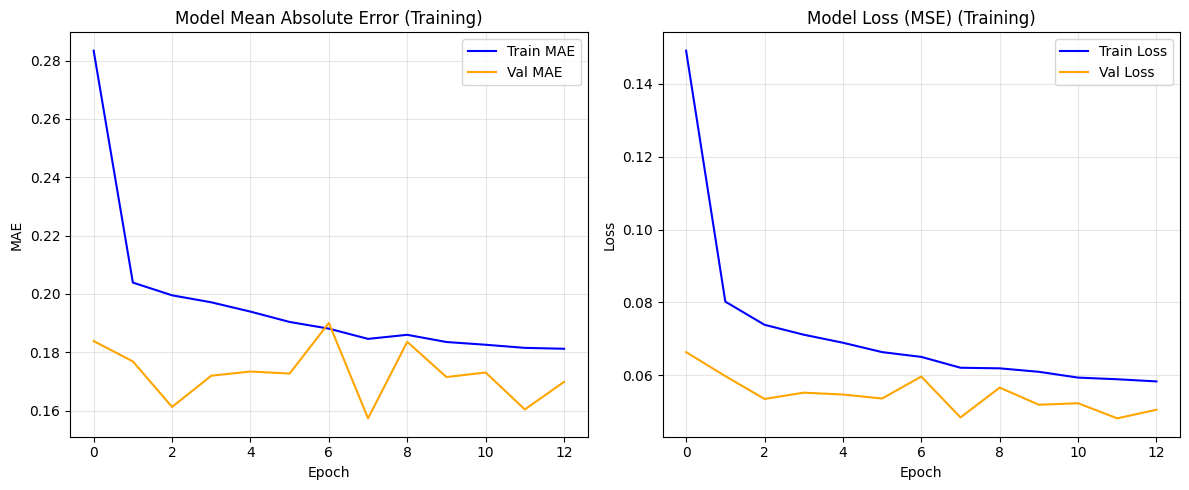

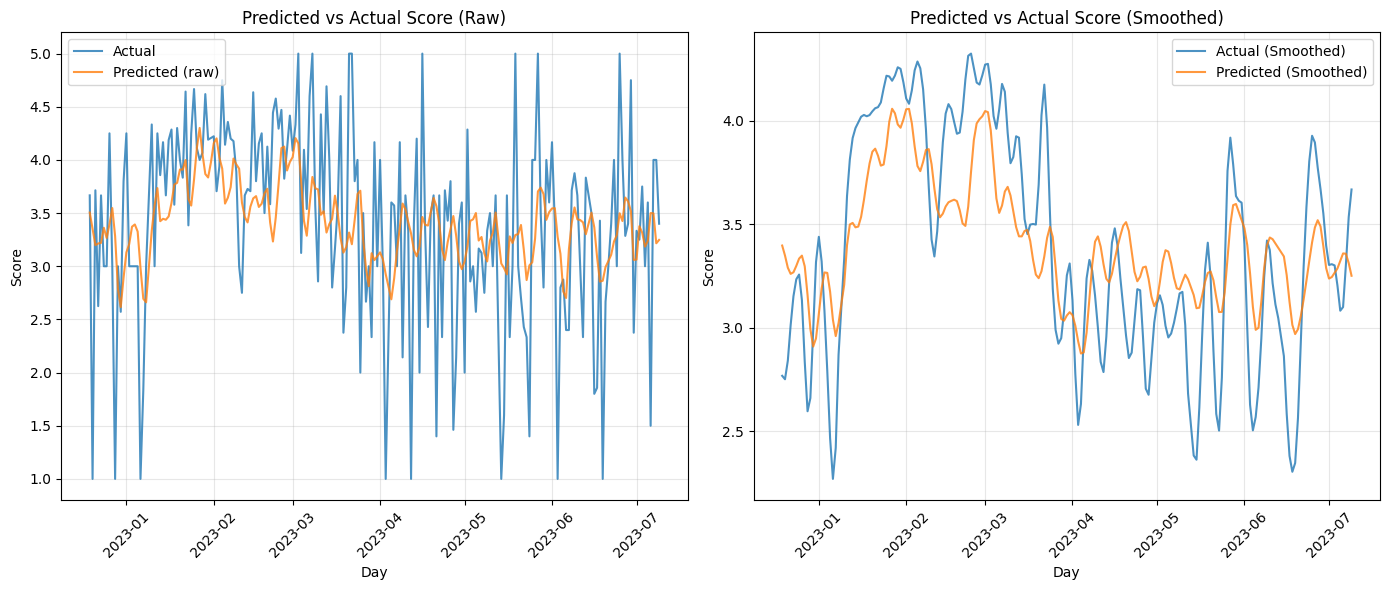

In [86]:
import matplotlib.pyplot as plt

# ===  Training history ===
plt.figure(figsize=(12, 5))

# Plot MAE
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE', color='blue')
plt.plot(history.history['val_mae'], label='Val MAE', color='orange')
plt.title('Model Mean Absolute Error (Training)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Loss (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss (MSE) (Training)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === Predictions vs Actuals (Score over time) ===
plt.figure(figsize=(14, 6))

# Limit view for readability (e.g., first 200 points)
N = 200
days_plot = df_forecast['Day'][:N]

# Plot raw predictions vs actual
plt.subplot(1, 2, 1)
plt.plot(days_plot, df_forecast['Actual_Score'][:N], label='Actual', alpha=0.8)
plt.plot(days_plot, df_forecast['Predicted_Score'][:N], label='Predicted (raw)', alpha=0.8)
plt.title('Predicted vs Actual Score (Raw)')
plt.xlabel('Day')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot smoothed predictions vs actual
plt.subplot(1, 2, 2)
plt.plot(days_plot, df_forecast['Actual_Score_Smoothed'][:N], label='Actual (Smoothed)', alpha=0.8)
plt.plot(days_plot, df_forecast['Predicted_Score_Smoothed'][:N], label='Predicted (Smoothed)', alpha=0.8)
plt.title('Predicted vs Actual Score (Smoothed)')
plt.xlabel('Day')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [87]:
# =========================
# 9️⃣ Predict + inverse scale
# =========================
from scipy.ndimage import gaussian_filter1d

# Predict on test sequences
y_pred = model.predict(X_test_seq).flatten()

# Inverse scale predictions and actuals (back to score units)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

# Smooth for visualization (Gaussian filter)
sigma_value = 1.5
y_pred_smooth = gaussian_filter1d(y_pred_inv, sigma=sigma_value)
y_test_smooth = gaussian_filter1d(y_test_inv, sigma=sigma_value)

# Build forecast DataFrame
df_forecast = pd.DataFrame({
    'Day': daily_test['day'].iloc[window_size - 1 : window_size - 1 + len(y_test_seq)].values,
    'Actual_Score': y_test_inv,
    'Predicted_Score': y_pred_inv,
    'Actual_Score_Smoothed': y_test_smooth,
    'Predicted_Score_Smoothed': y_pred_smooth
})

print(df_forecast.head())

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
         Day  Actual_Score  Predicted_Score  Actual_Score_Smoothed  \
0 2022-12-19      3.666667         3.505044               2.767885   
1 2022-12-20      1.000000         3.354325               2.751280   
2 2022-12-21      3.714286         3.198842               2.840752   
3 2022-12-22      2.625000         3.214139               3.012066   
4 2022-12-23      3.666667         3.219430               3.152067   

   Predicted_Score_Smoothed  
0                  3.396638  
1                  3.348240  
2                  3.289759  
3                  3.259897  
4                  3.267627  


In [88]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

# --- Parameters ---
FUTURE_STEPS = 3
window_size = X_test_seq.shape[1]  # must match training window
last_known_day = daily_data['day'].max()  # last day in your dataset

# --- Prepare last input sequence from test data ---
X_last_window = np.expand_dims(X_test_seq[-1], axis=0)  # shape: (1, window_size, feature_dim)

future_scores = []
future_days = []

for step in range(1, FUTURE_STEPS + 1):
    # Predict scaled value
    pred_scaled = model.predict(X_last_window, verbose=0).flatten()[0]
    # Inverse scale to original range
    pred_score = scaler_y.inverse_transform([[pred_scaled]])[0, 0]
    future_scores.append(pred_score)

    # Next day
    next_day = last_known_day + pd.Timedelta(days=step)
    future_days.append(next_day)

    # --- Update rolling window with predicted value ---
    new_window = X_last_window[0, 1:, :].copy()  # drop first day from window
    new_step = X_last_window[0, -1, :].copy()   # copy last day features

    # Replace target feature with predicted scaled value
    # Assuming the first column of X is the target-related feature (score)
    new_step[0] = pred_scaled

    # Append predicted step to window
    new_window = np.vstack([new_window, new_step])
    X_last_window = np.expand_dims(new_window, axis=0)

# --- Build forecast DataFrame ---
df_future = pd.DataFrame({
    'Day': future_days,
    'Predicted_Score_Smoothed': gaussian_filter1d(future_scores, sigma=1)
})

# --- Add placeholders for hover features (failure count + engineered stats) ---
hover_features = [
    'failures_count',    # keep failure count as feature
    'total_count',
    'failures_lag1',     # if you engineered lagged failure features
    'failures_ratio',
    'failures_roll_mean',
    'failures_roll_std',
    'failures_delta'
]
df_future['Review_Summary'] = 'No reviews yet'
for f in hover_features:
    df_future[f] = np.nan

print("Future Forecast for Next 3 Days:")
print(df_future[['Day', 'Predicted_Score_Smoothed']])



Future Forecast for Next 3 Days:
         Day  Predicted_Score_Smoothed
0 2025-01-01                  3.540744
1 2025-01-02                  3.771038
2 2025-01-03                  3.989365


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# =========================
# Hover Features (failure count + engineered stats)
# =========================
hover_features = [
    'failures_count',      # keep failure count as feature
    'total_count',
    'failures_lag1',       # lagged failure count
    'failures_ratio',
    'failures_roll_mean',
    'failures_roll_std',
    'failures_delta'
]

# =========================
# Merge Forecast + Features
# =========================
df_hover = (
    df_forecast.merge(
        daily_data[['day'] + hover_features],
        left_on='Day', right_on='day', how='left'
    )
)

df_hover = df_hover[['Day', 'Actual_Score_Smoothed', 'Predicted_Score_Smoothed'] + hover_features]

# =========================
# Future Forecast Placeholders
# =========================
for f in hover_features:
    df_future[f] = np.nan

# =========================
# Risk Threshold (score < 3 means HIGH risk)
# =========================
threshold = 3.0
df_hover['High_Risk'] = df_hover['Predicted_Score_Smoothed'] < threshold
# ⚠️ Fix: future should use its forecast column, not Predicted
df_future['High_Risk'] = df_future['Predicted_Score_Smoothed'] < threshold

# =========================
# Customdata for Hover
# =========================
def get_customdata(df_set):
    return np.stack([
        df_set.get('failures_count', pd.Series(0)).fillna(0),
        df_set.get('failures_lag1', pd.Series(0)).fillna(0),
        df_set.get('failures_ratio', pd.Series(0)).fillna(0),
        df_set.get('failures_roll_mean', pd.Series(0)).fillna(0),
        df_set.get('failures_roll_std', pd.Series(0)).fillna(0),
        df_set.get('failures_delta', pd.Series(0)).fillna(0),
        df_set.get('total_count', pd.Series(0)).fillna(0)
    ], axis=-1)

customdata_hover = get_customdata(pd.concat([df_hover, df_future], ignore_index=True))

# =========================
# Plotly Interactive Graph
# =========================
fig = go.Figure()

# --- Actual Score ---
fig.add_trace(go.Scatter(
    x=df_hover['Day'],
    y=df_hover['Actual_Score_Smoothed'],
    mode='lines+markers',
    name='Actual Score',
    line=dict(color='blue', width=2),
    customdata=customdata_hover[:len(df_hover)],
    hovertemplate=(
        'Date: %{x}<br>Actual Score: %{y:.2f}<br>'
        'Failures Count: %{customdata[0]:.0f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    )
))

# --- Predicted Score (Historical) ---
fig.add_trace(go.Scatter(
    x=df_hover['Day'],
    y=df_hover['Predicted_Score_Smoothed'],
    mode='lines+markers',
    name='Predicted Score',
    line=dict(color='red', width=2),
    customdata=customdata_hover[:len(df_hover)],
    hovertemplate=(
        'Date: %{x}<br>Predicted Score: %{y:.2f}<br>'
        'Failures Count: %{customdata[0]:.0f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    )
))

# --- Predicted Score (Future Forecast) ---
fig.add_trace(go.Scatter(
    x=df_future['Day'],
    y=df_future['Predicted_Score_Smoothed'],  # ⚠️ this must exist in df_future
    mode='lines+markers',
    name='Future Forecast',
    line=dict(color='orange', width=2, dash='dash'),
    customdata=customdata_hover[len(df_hover):],
    hovertemplate=(
        'Date: %{x}<br>Forecast Score: %{y:.2f}<br>'
        'Failures Count: %{customdata[0]:.0f}<br>'
        'Lag1: %{customdata[1]:.2f}<br>'
        'Ratio: %{customdata[2]:.2f}<br>'
        'Roll Mean: %{customdata[3]:.2f}<br>'
        'Roll Std: %{customdata[4]:.2f}<br>'
        'Delta: %{customdata[5]:.2f}<br>'
        'Total Count: %{customdata[6]:.0f}<extra></extra>'
    )
))

# =========================
# Risk Zones (continuous shading)
# =========================
def add_risk_zones(fig, df_set):
    days = pd.to_datetime(df_set['Day'])
    high_risk = df_set['High_Risk'].values

    start = None
    for i in range(len(high_risk)):
        if high_risk[i] and start is None:
            start = days.iloc[i]
        elif not high_risk[i] and start is not None:
            end = days.iloc[i]
            fig.add_vrect(
                x0=start, x1=end,
                fillcolor="red", opacity=0.2,
                layer="below", line_width=0
            )
            start = None
    if start is not None:
        fig.add_vrect(
            x0=start, x1=days.iloc[-1] + pd.Timedelta(days=1),
            fillcolor="red", opacity=0.2,
            layer="below", line_width=0
        )

# Apply risk shading
add_risk_zones(fig, df_hover)
add_risk_zones(fig, df_future)

# --- Threshold Line ---
fig.add_hline(
    y=threshold,
    line=dict(color="orange", width=2, dash="dash"),
    annotation_text=f"Risk Threshold ({threshold})",
    annotation_position="bottom right"
)

# --- Layout ---
fig.update_layout(
    title='Time Series: Actual, Predicted, and Future Forecast with Risk Zones',
    xaxis_title='Date',
    yaxis_title='Score',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()
